### There are two main techniques used in recommendation system, known as content-based filtering and collaborative filtering

### Content Based :
    Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.For example, if user A watched two horror movies, another horror movie will be proposed to him.
### Collaborative Filtering :
    To address some of the limitations of content-based filtering, collaborative filtering uses similarities between users and items simultaneously to provide recommendations. Collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Main advantage is that they learn users’ embeddings automatically, without the need for hand-engineering.
    
***

In [1]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for text processing
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# to display images
from skimage import io

# to save the required files
import pickle

import warnings
warnings.filterwarnings('ignore') # To prevent kernel from showing any warning

In [2]:
df = pd.read_csv('movies.csv')

# <p style="background-color:#C71A27;font-family:verdana;color:white;text-align:center;letter-spacing:0.5px;font-size:100%;padding: 10px"> Initial Analysis </p>

In [4]:
# How does the data look like?
df.head()

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,3.520565e+08,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,6.567582e+07,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,533535,Deadpool & Wolverine,Action-Comedy-Science Fiction,en,A listless Wade Wilson toils away in civilian ...,5410.496,Marvel Studios-Maximum Effort-21 Laps Entertai...,2024-07-24,200000000.0,1.326387e+09,128.0,Released,Come together.,7.765,3749.0,Ryan Reynolds-Hugh Jackman-Emma Corrin-Matthew...,hero-superhero-anti hero-mutant-breaking the f...,/8cdWjvZQUExUUTzyp4t6EDMubfO.jpg,/dvBCdCohwWbsP5qAaglOXagDMtk.jpg,573435-519182-957452-1022789-945961-718821-103...
3,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,4.070455e+08,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
4,693134,Dune: Part Two,Science Fiction-Adventure,en,Follow the mythic journey of Paul Atreides as ...,4742.163,Legendary Pictures,2024-02-27,190000000.0,6.838137e+08,167.0,Released,Long live the fighters.,8.300,2770.0,Timothée Chalamet-Zendaya-Rebecca Ferguson-Jav...,epic-based on novel or book-fight-sandstorm-sa...,/czembW0Rk1Ke7lCJGahbOhdCuhV.jpg,/xOMo8BRK7PfcJv9JCnx7s5hj0PX.jpg,438631-763215-792307-1011985-467244-634492-359...


In [4]:
#How big is data?
df.shape

(722334, 20)

In [5]:
# What is the data type of cols?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722334 entries, 0 to 722333
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    722334 non-null  int64  
 1   title                 722328 non-null  object 
 2   genres                512000 non-null  object 
 3   original_language     722334 non-null  object 
 4   overview              604087 non-null  object 
 5   popularity            722334 non-null  float64
 6   production_companies  337380 non-null  object 
 7   release_date          670758 non-null  object 
 8   budget                722334 non-null  float64
 9   revenue               722334 non-null  float64
 10  runtime               687995 non-null  float64
 11  status                722334 non-null  object 
 12  tagline               108461 non-null  object 
 13  vote_average          722334 non-null  float64
 14  vote_count            722334 non-null  float64
 15  

In [6]:
# Are there any missing values?
df.isnull().sum()

id                           0
title                        6
genres                  210334
original_language            0
overview                118247
popularity                   0
production_companies    384954
release_date             51576
budget                       0
revenue                      0
runtime                  34339
status                       0
tagline                 613873
vote_average                 0
vote_count                   0
credits                 224728
keywords                511715
poster_path             184518
backdrop_path           499140
recommendations         686419
dtype: int64

In [7]:
# Are there duplicate values?
df.duplicated().sum()

1

<div style="color:white;
           display:fill;
           background-color:#C71A27;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observations 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1. There are more than 7 lakh rows and 20 columns <br>
           2. Data consists of 6 numeric columns and 14 object/string columns <br>
           3. There are many columns with lots of missing valuest <br>
           4. There are duplicate values present in data <br>
        </p>
    </div>

# <p style="background-color:#C71A27;font-family:verdana;color:white;text-align:center;letter-spacing:0.5px;font-size:100%;padding: 10px"> Preprocessing </p>

In [8]:
# lets get rid of the duplicate values
df.drop_duplicates(inplace=True)

Let's check if there are any movies with same title

In [9]:
df['title'].duplicated().sum()

147013

Wow! there are 168580 movies with same title. Now these might be duplicate movies but there's possibility that some might be different movies with same title  
Thats why Let's check if there are any movies with same title and same release date

In [10]:
df[['title','release_date']].duplicated().sum()

62177

In [11]:
# lets get rid of the duplicate movies
df.drop_duplicates(subset=['title','release_date'], inplace=True)

In [12]:
df.shape

(660156, 20)

Now we have 6 lakh movies but most of the movies have 0 vote count. so we will consider only those movies which have at least more than 20 vote counts.

In [13]:
# filtering the movies
df1 = df[df.vote_count >= 20].reset_index()

In [14]:
df1.isnull().sum()

index                       0
id                          0
title                       0
genres                    164
original_language           0
overview                  441
popularity                  0
production_companies     3536
release_date                1
budget                      0
revenue                     0
runtime                     8
status                      0
tagline                 20970
vote_average                0
vote_count                  0
credits                   668
keywords                 9852
poster_path               117
backdrop_path            2128
recommendations         18519
dtype: int64

In [15]:
# Replace the Nan with ''
df1.fillna('', inplace=True)

We are making content based recommendation system and genres , overview are very important to find similar movies. So i will delete movies which don't have genres and overview.

In [16]:
# finding index with '' genres and overview
index = df1[(df1['genres']=='') & (df1['overview']=='')].index

In [17]:
# droping those index
df1.drop(index, inplace=True)

* genres, keywords and credits are seperated by '-'
* So replacing that with space
* and from credits only extracting first values words

In [18]:
df1['genres'] = df1['genres'].apply(lambda x: ' '.join(x.split('-')))
df1['keywords'] = df1['keywords'].apply(lambda x: ' '.join(x.split('-')))
df1['credits'] = df1['credits'].apply(lambda x: ' '.join(x.replace(' ', '').split('-')[:5]))

# <p style="background-color:#C71A27;font-family:verdana;color:white;text-align:center;letter-spacing:0.5px;font-size:100%;padding: 10px"> Creating Tags </p>

Lets create a column with all the important columns which describe a movie, so we can create tags out of it

In [19]:
df1['tags'] = df1['overview'] +' '+ df1['genres'] +' '+ df1['keywords'] +' '+ df1['credits'] +' '+ df1['original_language']

In [20]:
df1.tags[0]

'An exploratory dive into the deepest depths of the ocean of a daring research team spirals into chaos when a malevolent mining operation threatens their mission and forces them into a high-stakes battle for survival. Action Science Fiction Horror based on novel or book sequel kaiju JasonStatham WuJing ShuyaSophiaCai SergioPeris Mencheta en'

Let's apply stemming on tags column
<p style="background-color:#C71A27;font-family:verdana;color:white;text-align:center;letter-spacing:0.5px;font-size:100%;padding: 10px"> 📌 &nbsp; Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. </p>



In [21]:
stemmer = SnowballStemmer("english")
def stem(text):
    y = []
    
    for i in text.split():
        y.append(stemmer.stem(i))
        
    return ' '.join(y)

df1['tags'] = df1['tags'].apply(stem)

In [22]:
# Removing punctuation 
df1['tags'] = df1['tags'].str.replace('[^\w\s]','')

Let's apply stemming on tags column
<p style="background-color:#C71A27;font-family:verdana;color:white;text-align:center;letter-spacing:0.5px;font-size:100%;padding: 10px"> 📌 &nbsp; TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction. </p>



In [23]:
tfidf = TfidfVectorizer(stop_words='english')

In [24]:
tfidf_matrix = tfidf.fit_transform(df1['tags'])

In [25]:
df1.tags[0]

'an exploratori dive into the deepest depth of the ocean of a dare research team spiral into chao when a malevol mine oper threaten their mission and forc them into a high-stak battl for survival. action scienc fiction horror base on novel or book sequel kaiju jasonstatham wuje shuyasophiacai sergioperi mencheta en'

# <p style="background-color:#C71A27;font-family:verdana;color:white;text-align:center;letter-spacing:0.5px;font-size:100%;padding: 10px"> Recommendation System </p>

In [26]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = df1.index[df1['title'] == title][0]
    # show given movie poster
    try:
        a = io.imread(f'https://image.tmdb.org/t/p/w500/{df1.loc[idx, "poster_path"]}')
        plt.imshow(a)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass
    
    print('Recommendations\n')


    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df1.iloc[movie_indices]
    
    # show reco. movie posters
    fig, ax = plt.subplots(2, 4, figsize=(15,15))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(a)
        except: pass
    fig.tight_layout()
    fig.show()

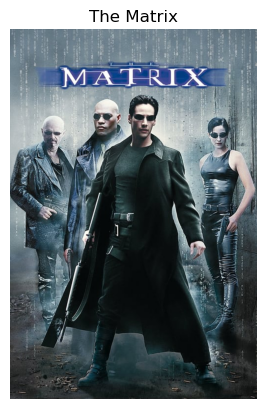

Recommendations



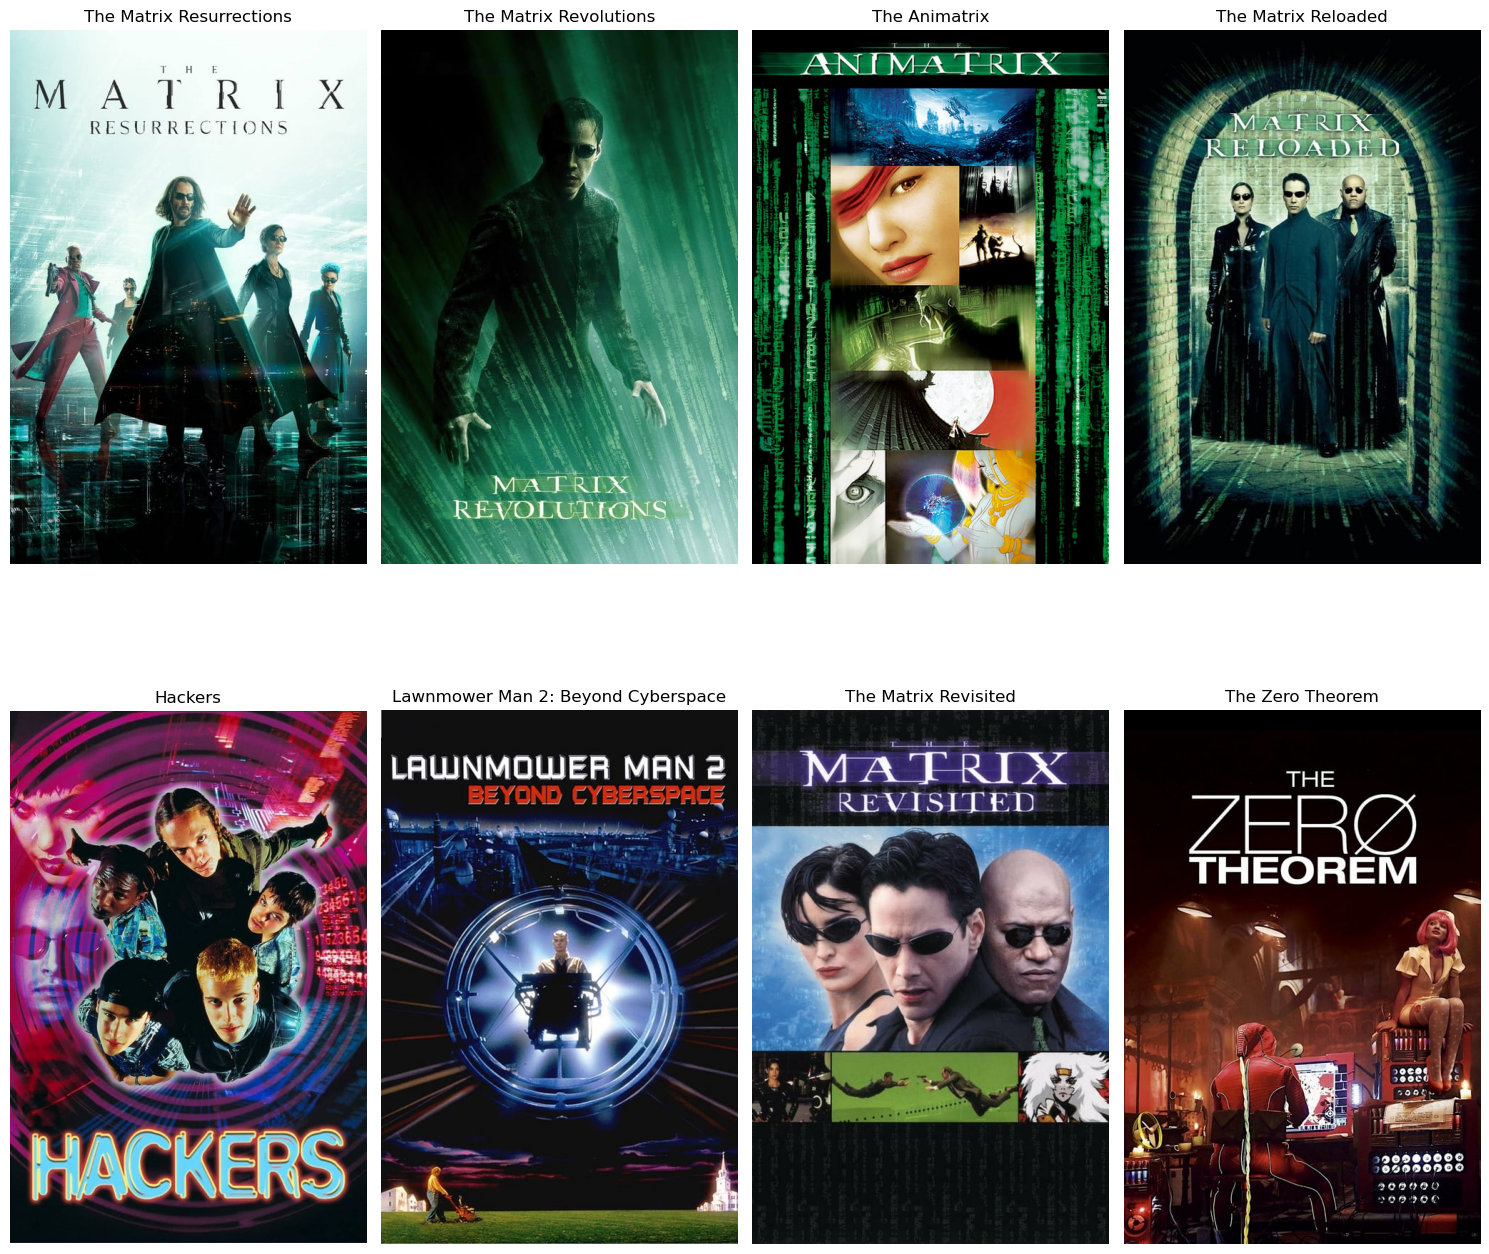

In [27]:
get_recommendations("The Matrix")

In [28]:
pickle.dump(df1,open('movie_list.pkl','wb'))
pickle.dump(tfidf_matrix,open('tfidf_matrix.pkl','wb'))

# <p style="background-color:#C71A27;font-family:verdana;color:white;text-align:center;letter-spacing:0.5px;font-size:100%;padding: 10px"> Deployment </p>

In [ ]:
# Install streamlit 
# NB : If any error occurs during installation process , run it again
!pip install -q streamlit
!npm install -g localtunnel -U

* To deploy any file, it should be in .py format
* Make a .py file and Put code for front and backhand inside .py file
* %%writefile command will convert all the code within this cell into .py file

In [54]:
%%writefile movie_recommendation_app.py

import pickle
import streamlit as st
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image

@st.cache
def get_recommendation(title):
    idx = df1.index[df1['title'] == title][0]
    poster = f'https://image.tmdb.org/t/p/w500/{df1.loc[idx, "poster_path"]}'

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:13]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df1.iloc[movie_indices]

    recommended_movie_names = []
    recommended_movie_posters = []
    recommended_movie_overview = []

    for i, j in enumerate(result.poster_path):
        recommended_movie_names.append(result.iloc[i].title)
        recommended_movie_posters.append(f'https://image.tmdb.org/t/p/w500/{j}')
        recommended_movie_overview.append(result.iloc[i].overview)
    return poster, recommended_movie_names, recommended_movie_posters, recommended_movie_overview


image = Image.open('Movie recommender system.jpg')
st.image(image)

st.markdown('You might have wondered sometime or at some point that how do platforms like Netflix or AmazonPrime Video are able to recommend us TV shows or movies, what kind of an algorithm do these websites use to recommend us movies. Well as complicated or difficult as it might seem this is simply just a mixture of some machine learning algorithms with some Natural Language Processing. ')
st.markdown('There are two main techniques used in recommendation system, known as content-based filtering and collaborative filtering')
st.markdown('For this project I have used Content Based Recommendation System, It uses attributes such as genre, director, description, actors, etc. for movies, to make suggestions for the users. The intuition behind this sort of recommendation system is that if a user liked a particular movie or show, he/she might like a movie or a show similar to it.')

df1 = pickle.load(open('movie_list.pkl ', 'rb'))
tfidf_matrix = pickle.load(open('tfidf_matrix.pkl ', 'rb'))

movies_list = df1['title'].values
selected_movie = st.selectbox('Type and Choose The Movie',movies_list)

if st.button('Show Recommendation'):
    poster,recommended_movie_names,recommended_movie_posters,recommended_movie_overview = get_recommendation(selected_movie)
    st.image(poster,width=160)
    col1, col2, col3, col4 = st.columns(4)
    with col1:
        st.image(recommended_movie_posters[0])
        st.markdown(recommended_movie_names[0])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[0])

        st.image(recommended_movie_posters[4])
        st.markdown(recommended_movie_names[4])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[4])

        st.image(recommended_movie_posters[8])
        st.markdown(recommended_movie_names[8])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[8])

    with col2:
        st.image(recommended_movie_posters[1])
        st.markdown(recommended_movie_names[1])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[1])

        st.image(recommended_movie_posters[5])
        st.markdown(recommended_movie_names[5])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[5])

        st.image(recommended_movie_posters[9])
        st.markdown(recommended_movie_names[9])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[9])

    with col3:
        st.image(recommended_movie_posters[2])
        st.markdown(recommended_movie_names[2])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[2])

        st.image(recommended_movie_posters[6])
        st.markdown(recommended_movie_names[6])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[6])

        st.image(recommended_movie_posters[10])
        st.markdown(recommended_movie_names[10])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[10])

    with col4:
        st.image(recommended_movie_posters[3])
        st.markdown(recommended_movie_names[3])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[3])

        st.image(recommended_movie_posters[7])
        st.markdown(recommended_movie_names[7])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[7])

        st.image(recommended_movie_posters[11])
        st.markdown(recommended_movie_names[11])
        with st.expander("OverView"):
            st.write(recommended_movie_overview[11])


Writing movie_recommendation_app.py


When you'll run following cell, it will display a UI in your terminal with public URL of your tunnel and other status and metrics information about connections made over your tunnel

In [ ]:
!streamlit run movie_recommendation_app.py & npx localtunnel --port 8501 